In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

import matplotlib.pyplot as plt
import seaborn as sns

# Cross Validation, Model Selection & Regularisation

In this notebook we will introduce the concepts below, and how they can be implemented in `scikit-learn`.
* Cross validation - a method for estimating the test error rate when test data is not available
* Model selection - how we use cross validation to select which model (from a selection) we should use for a particular data set
* Regularisation - an adaptation of linear regression to make it more flexible

[This video](https://www.youtube.com/watch?v=DQWI1kvmwRg) describes some of the ideas you will face in the coming notebook. The ideas we are covering here are described much more throughly in **ISLR** (see suggested sections in module overview).

https://trevorhastie.github.io/ISLR/

------

# Cross Validation

### K-fold cross validation

#### Task 1

* Have a look at the code below and check you understand what is going on. (Add some print statements in various places to help.)

In [2]:
from sklearn.model_selection import KFold

In [3]:
X = np.array([['A', 'B'], ['C', 'D'], ['E', 'F'], ['G', 'H']])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=3) # here we choose the number of folds (or splits) we will make
kf.get_n_splits(X)

for train_index, valid_index in kf.split(X): # kf.split(X) is an iterable which gives us the indices of the data in each fold
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

- n_splits=3: 
Specifies that the dataset will be split into 3 folds or subsets. In other words, the cross-validation process will be repeated 3 times, with each fold used once for testing and the other 2 folds used for training.

- random_state=None
Specifies that no specific seed will be used for the random number generator. If you want to ensure that the same random splits are generated each time you run the code, you can set this parameter to an integer value.

- shuffle=False
Specifies that the data will not be shuffled before splitting it into folds. If you want to shuffle the data before splitting it, you can set this parameter to True.


In [4]:
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [5]:
for train_index, valid_index in kf.split(X):
    print("Train index --> ", train_index)
    print("Subset X ----->", X[train_index])
    print("Valid index --> ", valid_index)
    print("Subset valid ->", X[valid_index])

Train index -->  [2 3]
Subset X -----> [['E' 'F']
 ['G' 'H']]
Valid index -->  [0 1]
Subset valid -> [['A' 'B']
 ['C' 'D']]
Train index -->  [0 1 3]
Subset X -----> [['A' 'B']
 ['C' 'D']
 ['G' 'H']]
Valid index -->  [2]
Subset valid -> [['E' 'F']]
Train index -->  [0 1 2]
Subset X -----> [['A' 'B']
 ['C' 'D']
 ['E' 'F']]
Valid index -->  [3]
Subset valid -> [['G' 'H']]


#### Task 2
* try adding print statements for the size of the dataframes in each split
* try increasing the number of splits and re-run your code
* use the code below to print a car name contained in the train and validation data set, for each split



In [6]:
auto = pd.read_csv('./data/Auto.csv')
auto = auto[auto.horsepower != '?']
auto['horsepower'] = auto.horsepower.astype(int)
auto.reset_index(inplace=True, drop=True)
auto.shape

(392, 9)

In [7]:
mpg = auto.pop('mpg') # mpg will be our target and so we remove this into a seperate array

In [8]:
# on a 392 lignes

kf = KFold(n_splits=10) # here we choose the number of folds (or splits) we will make
kf.get_n_splits(auto)

print(kf)
print("")


split_counter = 1
for train_index, valid_index in kf.split(auto): # kf.split(X) is an iterable which gives us the indices of the data in each fold
    #print('-'*60)
    #print('This is split no: {}'.format(split_counter))
    split_counter += 1 
    X_train, X_valid = auto.iloc[train_index], auto.iloc[valid_index] # must use .iloc because its a dataframe this time
    y_train, y_valid = mpg[train_index], mpg[valid_index]
    
    print("°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°")
    print("Complementarity of Index")
    print("Train index -->")
    print("")
    print(train_index)
    print("Valid index --> ")
    print("")
    print(valid_index) 
    print("")
    print("---------------------------------------------------------")
    print("")
    print("Somme des listes d'index --> ")
    print(f"S = {len(train_index)}+{len(valid_index)} = {len(train_index) + len(valid_index)}")
    print("")
    print("---------------------------------------------------------")
    print("TRAIN set Car data :")
    print(f"The car name at index --> {train_index[6]} <-- is --> {X_train.loc[train_index[6],'name']}")
    print("")
    print("---------------------------------------------------------")
    print("VALID set Car data :")
    print(f"The car name at index --> {valid_index[6]} <-- is --> {X_valid.loc[valid_index[6],'name']}")
    print("")
    print("°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°")
    # your code here
    #print('Train car name here', X_train["name"])
    #print('Validation car name here')

KFold(n_splits=10, random_state=None, shuffle=False)

°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
Complementarity of Index
Train index -->

[ 40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 2

### Test regression on different substets

In [9]:
auto = auto.drop('name', axis=1, errors='ignore') # we do not need the car names so remove for now.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


split_counter = 1
mse_scores = [] # create empty list to append mse scores for each split
kf = KFold(n_splits=5)
kf.get_n_splits(auto)

for train_index, valid_index in kf.split(auto): # kf.split(X) is an iterable which gives us the indices of the data in each fold
    print('-'*60)
    print('This is split no: {}'.format(split_counter))
    print('Model results')
    split_counter += 1 
    X_train, X_valid = auto.iloc[train_index], auto.iloc[valid_index] # must use .iloc because its a dataframe this time
    y_train, y_valid = mpg[train_index], mpg[valid_index]
    
    
    #### fit polynomial to train data in this split
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    
    #### eval & print MSE training results in this split
    mpg_train_pred = lin_reg.predict(X_train)
    mse_train = mean_squared_error(y_train, mpg_train_pred)
    print('training MSE: {0}'.format(mse_train))
    
    #### do the same for validation split
    mpg_valid_pred = lin_reg.predict(X_valid)
    mse_valid = mean_squared_error(y_valid, mpg_valid_pred)
    print('validation MSE: {0}'.format(mse_valid))
    
    mse_scores.append(mse_valid) # assign validation MSE score to list

------------------------------------------------------------
This is split no: 1
Model results
training MSE: 11.284070590565994
validation MSE: 14.974307651304237
------------------------------------------------------------
This is split no: 2
Model results
training MSE: 11.155158050598772
validation MSE: 10.905952427081187
------------------------------------------------------------
This is split no: 3
Model results
training MSE: 12.160105136871517
validation MSE: 5.99170861010817
------------------------------------------------------------
This is split no: 4
Model results
training MSE: 9.92167414540569
validation MSE: 15.587544657621594
------------------------------------------------------------
This is split no: 5
Model results
training MSE: 7.977511689294957
validation MSE: 27.844743081984188


#### Validation of MSE computed on several subsets

In [11]:
mse_scores  = np.array(mse_scores)
print('VALIDATION SET MSE SCORES')
print('mean MSE:', mse_scores.mean())
print('std MSE:', mse_scores.std())

VALIDATION SET MSE SCORES
mean MSE: 15.060851285619876
std MSE: 7.2556918148909215


In [12]:
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
cv_scores = cross_val_score(lin_reg, auto, mpg, cv = 5, scoring='neg_mean_squared_error') 

print(f"MSE par KFOLD --> {-cv_scores}")
print('mean MSE:',np.mean(-cv_scores))
print('std MSE:',np.std(-cv_scores))

MSE par KFOLD --> [14.97430765 10.90595243  5.99170861 15.58754466 27.84474308]
mean MSE: 15.060851285619876
std MSE: 7.2556918148909215


#### Task 3

- Make sure you understand the output of the cross_val_score above (i.e. What is cv_scores?)

- Why is the scoring defined as negative MSE? Do some research

- Investigate what the `cross_val_predict` function does.

- Import and implement `cross_val_predict`on the same data as above.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(auto, mpg, random_state = 18)

lin_reg = LinearRegression()


predictions = cross_val_predict(lin_reg, X_train, y_train, cv=5)




cv_scores = cross_val_score(lin_reg, auto, mpg, cv = 5, scoring='neg_mean_squared_error') 
cv_scores.std()
mpg.std()

7.805007486571799

- What are the outputs of this function?

Results MSE 
15.060851285619876
7.2556918148909215


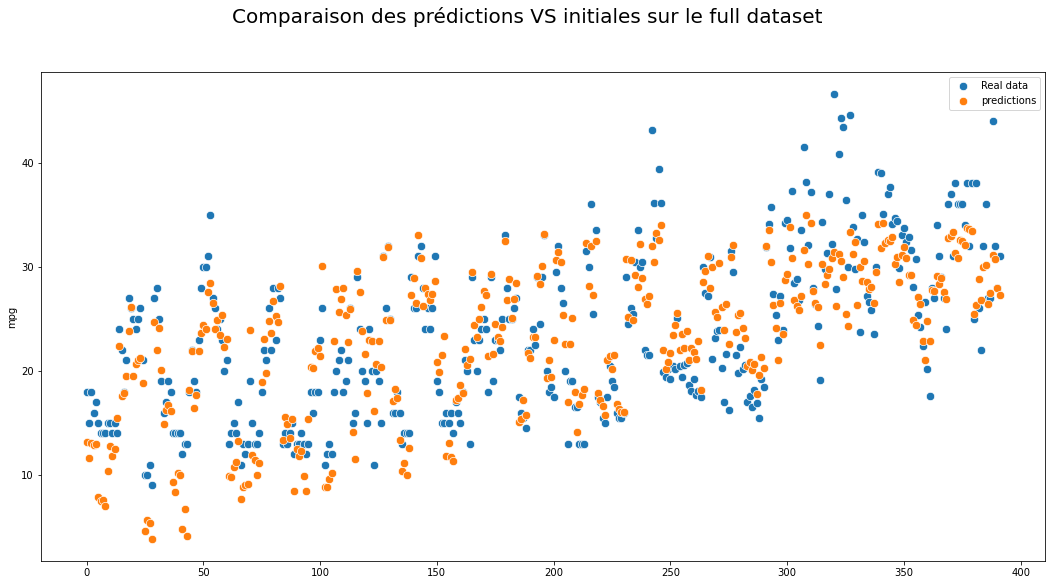

In [21]:
print("Results MSE ")
print(-cv_scores.mean())
print(cv_scores.std())

fig, ax = plt.subplots(figsize=(18,9))
fig.suptitle("Comparaison des prédictions VS initiales sur le full dataset", fontsize=20)


ax = sns.scatterplot(
    data=auto, 
    x=auto.index, 
    #x="MSE",
    y=mpg, 
    s=70,
    label="Real data"
)
ax = sns.scatterplot(
    data=auto, 
    x=auto.index, 
    #x="MSE",
    y=predictions, 
    s=70,
    label="predictions"
)

- Can you use these to evaluate the results of your cross validation?

- Do the cross-validation scores give you confidence this model is providing a useful prediction?

## Excercise 1: wine cross-validation

You must predict the alcohol content of various wines based on their other attributes.

* Split the data into train and test data sets (Ensure you use the option: `random_state = 28`).
* Perform linear regression using k-fold cross validation(ensure you use 5 folds). Return the cross validation MSE errors. Return the mean and standard deviations of these.
* Evaluate the performance of the model on the test set.
* Compare the cross-validation error and the test error (MSE). What do you find? 
* Try removing the random_state option. What happens to your results? Explain why.